In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import datetime

train = pd.read_csv('C:/Users/Yunfei Cai/Desktop/Porsche data.csv')
#初始設定----------------------------------------------------------------------

C:\Users\Yunfei Cai\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train=train.drop(["Vin"],axis=1)


train_y= train["Price"]
train_x= train.drop(["Price"],axis=1)


train_x=pd.get_dummies(train_x)



test_x=train_x.sample(n=500,random_state=0)
train=train_x.drop(train_x.sample(n=500,random_state=0).index,axis=0)

test_y=train_y.sample(n=500,random_state=0)
train=train_y.drop(train_y.sample(n=500,random_state=0).index,axis=0)


train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.3)

#training set
train_x=train_x.values
train_y=train_y.values
train_y=train_y.reshape(-1,1)
val_x=val_x.values
val_y=val_y.values
val_y=val_y.reshape(-1,1)
test_x=test_x.values
test_y=test_y.values
test_y=test_y.reshape(-1,1)


#Standardization
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)



#PCA---------------------------------------------------------------------------

pca_num=0
delta=0.1

pca=PCA(n_components = 0.99)
train_x=pca.fit_transform(train_x)
val_x=pca.transform(val_x)
test_x=pca.transform(test_x)
dimention=train_x.shape[1]


294416.96046233847
103617.36686330759
6646.473453590433
272334.407470094
60227.394082957566
173634.48264062832
297865.30401894095
40384.44475809456
20540.878383103645
43259.656372056306
40048.850730666185
165077.74684877694
9341.133756854542
5430.411975426269
73669.02001963063
5533.301520808241
44430.22163565501
26759.965844101233
105730.280322478
62375.503781471256
102683.18923916407
71520.843059494
46398.07292484948
146609.80310602856
7851.216065302026
344481.04572085885
33343.24831927705
294103.7400767351
84138.2364480575
19969.378114973664
cross—validation mean rmse= 100080.75260052402
the processing time is : 14 seconds
finish, plot the scatter figure


<Figure size 432x288 with 0 Axes>

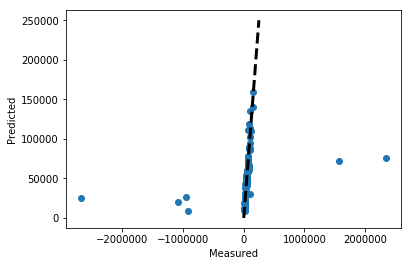

In [3]:
#Linear Regression
starttime = datetime.datetime.now()
from sklearn import linear_model
K=30
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0

rmse_his=[]
for train_index, val_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[val_index])
    
    mse=np. mean( y_LR - train_y[val_index]) ** 2
    rmse=np.sqrt(mse)
    rmse_his=np.append(rmse_his, rmse)
    print(rmse)
    
print("cross—validation mean rmse=",np.mean(rmse_his))
endtime = datetime.datetime.now()
print ("the processing time is :",(endtime - starttime).seconds,"seconds")

print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_LR,  train_y[val_index])

ax.plot( [1,250000], [1,250000], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()   
plt.pause(0.1)



testing set rmse= 12006.52114131276
the processing time is : 0 seconds
finish, plot the scatter figure


<Figure size 432x288 with 0 Axes>

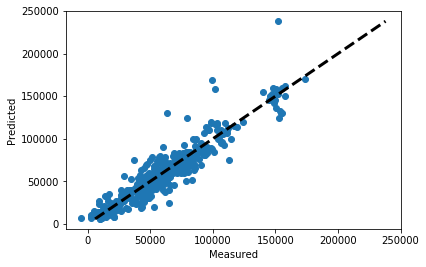

In [4]:
starttime = datetime.datetime.now()
LR.fit(train_x,train_y)
y_LR0 = LR.predict (test_x)
mse0=np. mean(( y_LR0 - test_y) ** 2)
rmse0= np.sqrt(mse0)
print("testing set rmse=",rmse0)
endtime = datetime.datetime.now()
print ("the processing time is :",(endtime - starttime).seconds,"seconds")

print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_LR0,  test_y)

ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')


plt.show()   
plt.pause(0.1)